In [11]:
using DifferentialEquations, FindPeaks
using Plots
my=1000
C=1
gNa=40
gK=35
gLeak=0.3
ENa=55
EK=-77
ELeak=-65
Iapp1=1.3
Iapp2=1.2


1.2

In [12]:
function neyron(du,u,p,t)
    #V,m,n,h,V2,m2,n2,h2=u
    V=u[1]
    m=u[2]
    n=u[3]
    h=u[4]
    
    V2=u[5]
    m2=u[6]
    n2=u[7]
    h2=u[8]
    # first neyron
    du[1]=my*(1/C)*(gNa*(m^3)*h*(ENa-V)+gK*n*(EK-V)+gLeak*(ELeak-V)+Iapp1)
    du[2]=my*(((0.182*(V+35))/(1-exp((-(V+35))/9)))*(1-m)-(((-0.124)*(V+35))/(1-exp((V+35)/9)))*m)
    du[3]=my*(((0.02*(V-25))/(1-exp((-(V-25))/9)))*(1-n)-(((-0.002)*(V-25))/(1-exp((V-25)/9)))*n)
    du[4]=my*((0.25*exp((-(V+90))/12))*(1-h)-(0.25*((exp((V+62)/6))/(exp((V+90)/12))))*h)
    
    # second neyron
    du[5]=my*(1/C)*(gNa*(m2^3)*h2*(ENa-V2)+gK*n2*(EK-V2)+gLeak*(ELeak-V2)+Iapp2)
    du[6]=my*(((0.182*(V2+35))/(1-exp((-(V2+35))/9)))*(1-m2)-(((-0.124)*(V2+35))/(1-exp((V2+35)/9)))*m2)
    du[7]=my*(((0.02*(V2-25))/(1-exp((-(V2-25))/9)))*(1-n2)-(((-0.002)*(V2-25))/(1-exp((V2-25)/9)))*n2)
    du[8]=my*((0.25*exp((-(V2+90))/12))*(1-h2)-(0.25*((exp((V2+62)/6))/(exp((V2+90)/12))))*h2)

end

# возвращаем массив по решению
# solve само решение
# comp
function getArrFromSol(solve,comp)
    
    size1=size(solve.t)[1]
    out=zeros(size1)
    if(comp==0)
        out=solve.t
    else
        for i in 1:size1
            out[i]=solve.u[i][comp]
        end
    end
    return out
end

getArrFromSol (generic function with 1 method)

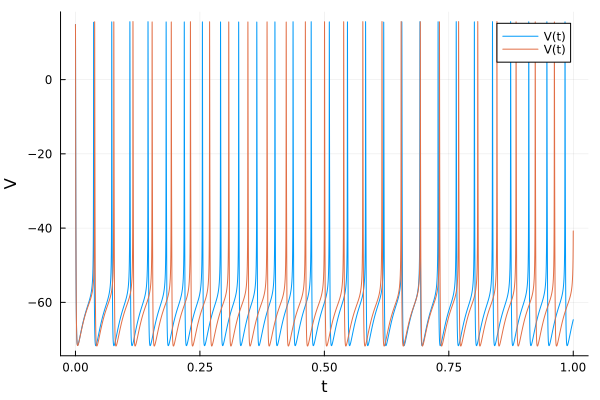

In [22]:
#u0 = [-58.7085;0.0953;0.000913;0.3662;-58.7085;0.0953;0.000913;0.3662] #stable focus
u0 = [14.8409;0.9174;0.0140;0.0539;14.8409;0.9174;0.0140;0.0539] #limit cycle
#u0 = [1.0;0.0;0.0;0.0]
tspan = (0.0,1)
prob = ODEProblem(neyron,u0,tspan)
sol = solve(prob,RK4())

time=getArrFromSol(sol,0)
firstV=getArrFromSol(sol,1)
secondV=getArrFromSol(sol,5)

plot(time, [firstV, secondV], label="V(t)", yaxis="V", xaxis="t")
#plot(sol, vars=(0,5), label="V(t)", yaxis="V", xaxis="t")


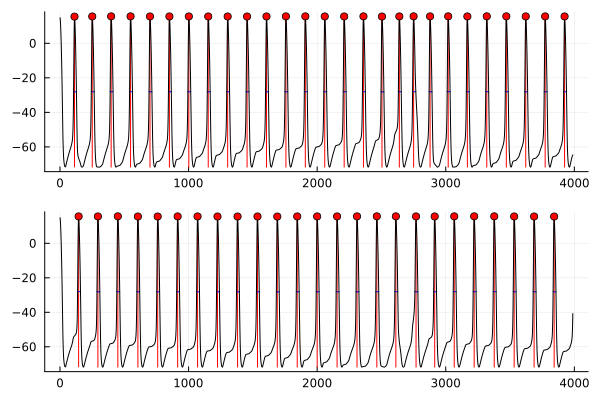

In [24]:
firstPeaks = findpeaks(firstV)
secondPeaks = findpeaks(secondV)
p1=plot(firstPeaks, firstV)
p2=plot(secondPeaks, secondV)
plot(p1,p2,layout = (2,1))

0.02825 0.06275 0.0995 0.13725 0.175 0.21275 0.2505 0.28825 0.326 0.36375 0.4015 0.43925 0.477 0.51475 0.5525 0.59 0.626 0.65975 0.6875 0.7195 0.75475 0.792 0.82975 0.86775 0.9055 0.94325 0.981 

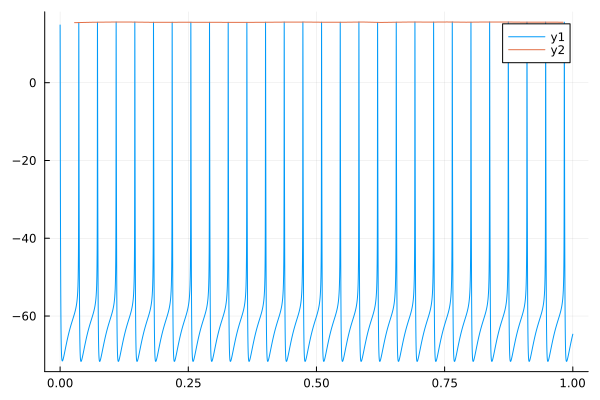

In [32]:
locationsFirst=peaklocations(firstPeaks)
heightsFirst=peakheights(firstPeaks)
trueLocation=Array{Float64}(undef,0)

for loc in locationsFirst
    newLoc=loc/4000
    print(newLoc, " ")
    push!(trueLocation, newLoc)
end
plot(time, firstV)
plot!(trueLocation, heightsFirst)
#frequency=Array{Float64}(undef,0)
#push!(frequency, 0)

In [34]:
print(time)
print("newLoc",trueLocation)

[0.0, 4.3526739813309284e-5, 5.925516835554589e-5, 8.618395738251952e-5, 0.00010763889480723378, 0.0001331799136687494, 0.00015845036463436383, 0.0001862467248734576, 0.0002155593158676096, 0.00024747037948433476, 0.00028098504573108025, 0.00031951741566431315, 0.0003617840361108555, 0.0004097416406570031, 0.0004638531901053234, 0.0005258050201097101, 0.0005970177233209985, 0.0006795489486450393, 0.0007751768864379483, 0.0008844773051435005, 0.0010081503142832342, 0.001154250403171346, 0.001294483592765276, 0.0014455906652895744, 0.0015880229211410347, 0.001734926250733128, 0.001881223042582828, 0.002027399011592339, 0.0021674173733126374, 0.0023082031401224458, 0.0024482395977646165, 0.002591400154696944, 0.0027381920206906965, 0.002891453020720583, 0.0030526803751869313, 0.0032245654433825295, 0.0034093674200033936, 0.003610174342670203, 0.0038302042842309736, 0.004073637598437666, 0.004345652279220282, 0.004653854209269429, 0.00501098493270451, 0.005448265403939445, 0.00596608934391

, 0.1957468954032883, 0.19594897673415745, 0.196170481249311, 0.19641547178849614, 0.19668946059354692, 0.1969996076659107, 0.19735699476177487, 0.1977768500593967, 0.19823425008058357, 0.19870173452470427, 0.19919579824223962, 0.1996997814967475, 0.20020895636413166, 0.20071261763705775, 0.20121221750351925, 0.20170734134647328, 0.20219981054155534, 0.20269029458703675, 0.20317985473997419, 0.20366914630497363, 0.20415888693500395, 0.2046496383973925, 0.20514194712027753, 0.20563628072760815, 0.20613307236460132, 0.20663270187310756, 0.20713550947850254, 0.20764178894959293, 0.20815178994487304, 0.20866571203835554, 0.2091837001798812, 0.20970583460174236, 0.2102321174353311, 0.21076245192830786, 0.2112966118917341, 0.21183419639736734, 0.21237456321967962, 0.2129167334971609, 0.2134592647820168, 0.21400009945110576, 0.21453642451960725, 0.21506460027686913, 0.21558019084593924, 0.2160780162789518, 0.21655203402937684, 0.21699491068345453, 0.21739725250388975, 0.21768677958465643, 0.2

, 0.38467979402744323, 0.38472191594649424, 0.3847609859063307, 0.38479652248129464, 0.38483004996739906, 0.3848627622415352, 0.3848925151461839, 0.3849230568592577, 0.38495517995464196, 0.3849838789417136, 0.38501398337729625, 0.3850443385801787, 0.38507654346403725, 0.3851106031145069, 0.3851473879299183, 0.38518734257921605, 0.38523244480229824, 0.3852829372416646, 0.3853405936642042, 0.3854067429563039, 0.38548353252925605, 0.3855731931031018, 0.3856778350640429, 0.3857973906181282, 0.38593466585699104, 0.38608530207164815, 0.3862371773423442, 0.3863910962598787, 0.3865430914517856, 0.38669790377272834, 0.3868538979638313, 0.3870015722345842, 0.3871507932817046, 0.3872986051490176, 0.38745028375902774, 0.38760590134062783, 0.38776914213785063, 0.38794153210724364, 0.3881264611825736, 0.3883265221635586, 0.38854558577005843, 0.38878757295558847, 0.3890578921808132, 0.3893634685834175, 0.3897154665495635, 0.39013569233164197, 0.3906680996917108, 0.39115418858211876, 0.391712231597808

, 0.5038077059224896, 0.5040307567452854, 0.504277655579378, 0.5045540149705995, 0.5048672996029933, 0.5052295705560608, 0.5056612846930162, 0.5061314510508285, 0.506594879921642, 0.5070722582674421, 0.5075341664950435, 0.5079826592434913, 0.5084035762753701, 0.5087898352848189, 0.5090751168907942, 0.5092935065251032, 0.5094560088126439, 0.5095753069163447, 0.5096605535339275, 0.5097231849517464, 0.5097721733890614, 0.5098121130900246, 0.5098490928658849, 0.5098856596925481, 0.5099181106241538, 0.5099499687975072, 0.5099792151198104, 0.5100106496018073, 0.5100410198299214, 0.5100701802416497, 0.5101000166027673, 0.5101307314321301, 0.5101631610293522, 0.5101977331739533, 0.5102349571189128, 0.5102759878467276, 0.51032200606294, 0.5103738585658044, 0.5104330530020722, 0.5105011734586893, 0.5105803359074161, 0.5106728637694915, 0.5107805810749081, 0.5109032030381843, 0.5110454087971991, 0.5111947073904758, 0.5113497800817896, 0.5115020639327896, 0.5116555384341169, 0.5118104785683791, 0.

, 0.6713583656230128, 0.6718578730002637, 0.6723617744249301, 0.6728702365506384, 0.6733833949945995, 0.6739013530258262, 0.6744241804189434, 0.6749519121205736, 0.6754845467078487, 0.67602204512094, 0.6765643290953613, 0.6771112797803067, 0.6776627364701363, 0.6782184954452894, 0.67877830847001, 0.6793418819395877, 0.6799088751460615, 0.6804788989193373, 0.6810515132867534, 0.681626224827773, 0.6822024829064453, 0.6827796743617105, 0.6833571167413001, 0.6839340490116261, 0.6845096195127842, 0.6850828702600366, 0.685652716961213, 0.6862179234759535, 0.6867770696577719, 0.6873285101105769, 0.6878703209490857, 0.6884002277314929, 0.6889155024867637, 0.6894128027401807, 0.6898879198329703, 0.6903353092151856, 0.69074734165733, 0.6910640788146475, 0.6913115139493176, 0.6914972634404621, 0.6916351653113122, 0.6917346775544435, 0.6918062711563555, 0.6918609215326177, 0.6919045225467303, 0.6919403733578304, 0.6919733903933164, 0.6920064571870146, 0.6920382743369526, 0.6920677008502963, 0.6920

 0.8079550118173737, 0.8079986224340732, 0.8080344734551589, 0.8080674947443617, 0.808100554119678, 0.8081323307543058, 0.8081617397481508, 0.8081904810150868, 0.8082225531848074, 0.8082511610401922, 0.808280470156951, 0.808309874585026, 0.8083407306739459, 0.8083732065625866, 0.808408089680417, 0.8084454563557766, 0.808487281153784, 0.808533942129562, 0.8085868345266588, 0.8086472106939109, 0.8087168847423678, 0.8087979280089639, 0.8088927120318499, 0.8090027385909783, 0.8091277551018728, 0.8092743859508599, 0.8094223754813561, 0.8095802357423066, 0.8097308808335105, 0.8098854479709293, 0.8100401121854148, 0.8101926528356591, 0.8103405987625419, 0.8104890001633165, 0.8106379477801962, 0.8107907906667216, 0.8109489040509058, 0.8111151990994462, 0.8112918435600229, 0.8114819531045925, 0.8116885426194573, 0.8119154983241892, 0.812167190449151, 0.8124494237521885, 0.8127699996735954, 0.8131402195331521, 0.8135644809333048, 0.8140024157664331, 0.8144604320844214, 0.814930736190721, 0.81541

, 0.930930354008819, 0.9314553757934732, 0.9319669855140035, 0.9324719479803367, 0.932970622100765, 0.9334659557041732, 0.9339587722817574, 0.9344504050396508, 0.9349415723570141, 0.9354330850273003, 0.9359255370862347, 0.9364195080225309, 0.9369154737076366, 0.9374138678218111, 0.9379150535476545, 0.9384193397825198, 0.9389269657500247, 0.9394380950473376, 0.9399527924556323, 0.9404709914759761, 0.9409924375356974, 0.9415165973553953, 0.9420425148572033, 0.942568598739481, 0.9430923499569066, 0.9436101102268172, 0.9441169889697589, 0.944607034989965, 0.9450733726122346, 0.9455079467353975, 0.9459007491949339, 0.9461764653936225, 0.9463861638335903, 0.9465413838682101, 0.9466547373317545, 0.9467356911529592, 0.9467957474709442, 0.9468430146933094, 0.9468817656871, 0.9469176321760855, 0.9469529824712055, 0.946985317213774, 0.9470163620108772, 0.947045443781297, 0.9470769857497101, 0.9471068291477678, 0.9471360149037792, 0.9471657163560323, 0.9471964592440321, 0.9472288909695237, 0.94726